# Prospecção de Dados 2021/2022

**Alunos:**
    Pedro Oliveira (52754), Rodrigo Ferreira (51032), Rui Roque (57588)

## Third Home Assignment

### 1.0 Carregamento dos Dados

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, fpgrowth
import matplotlib.pyplot as plt
import time
from pyfim import pyeclat
from mlxtend.frequent_patterns import fpmax

Configuração dos dataframes:

In [2]:
#configuração dos dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [3]:
def load_transactions (file_name, sep=","):
    lines = open(file_name, 'rt').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

In [4]:
retail=load_transactions("Online_Retail.txt", sep="\t")

#Number of transactions
len(retail)

24388

## **2.0 Objetivo 1 - Identificação das regras mais relevantes**

### 2.1 Identificação de conjuntos de itens frequentes utilizando o algoritmo ECLAT

Para a seleção das regras mais relevantes optou-se pela utilização do algoritmo ECLAT porque este apresenta melhor performance para conjuntos de dados de maiores dimensões (com base nos resultados obtidos na TP 7).

De seguida foi utilizada a função pyeclat que retorna um Dataframe com os itemsets frequentes do conjunto de dados:

In [5]:
t0 = time.time()
FI_eclat= pyeclat(retail, 0.02)
t1 = time.time()
t = t1-t0
FI_eclat

,support,itemsets
0,0.020051,"(FELTCRAFT BUTTERFLY HEARTS,)"
1,0.020051,"(PANTRY MAGNETIC SHOPPING LIST,)"
2,0.020051,"(SET/3 RED GINGHAM ROSE STORAGE BOX,)"
3,0.020133,"(LUNCH BOX WITH CUTLERY RETROSPOT,)"
4,0.020338,"(LUNCH BAG DOILEY PATTERN,)"
...,...,...
491,0.075119,"(REGENCY CAKESTAND 3 TIER, country:United Kingdom)"
492,0.088937,"(REGENCY CAKESTAND 3 TIER,)"
493,0.090454,"(WHITE HANGING HEART T-LIGHT HOLDER, country:United Kingdom)"
494,0.094391,"(WHITE HANGING HEART T-LIGHT HOLDER,)"


### 2.2 Performance do algoritmo ECLAT 

In [6]:
print("O tempo que demorou a fazer a pesquisa:", t, "segundos")

O tempo que demorou a fazer a pesquisa: 0.9325110912322998 segundos


### 2.3 Gerar regras de Associação dos conjuntos de itens frequentes

Identificação de todas as regras de associação utilizando um threshold de 70% na confiança e ordenadas pelo lift por ordem decrescente :

In [7]:
# Generate association rules with confidence >= 70%
rules = association_rules(FI_eclat, metric="confidence", min_threshold=0.70)
rules.sort_values( by=['lift'],ascending=[False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
125,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(PINK REGENCY TEACUP AND SAUCER),0.032147,0.032844,0.022511,0.700255,21.320626,0.021455,3.226597
123,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.025176,0.043341,0.022511,0.894137,20.630282,0.021420,9.036748
118,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.022839,0.043341,0.020379,0.892280,20.587442,0.019389,8.880985
121,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)","(country:United Kingdom, GREEN REGENCY TEACUP AND SAUCER)",0.025176,0.039774,0.020379,0.809446,20.351315,0.019378,5.039137
108,(GARDENERS KNEELING PAD CUP OF TEA),"(country:United Kingdom, GARDENERS KNEELING PAD KEEP CALM)",0.031368,0.037231,0.022306,0.711111,19.099755,0.021138,3.332660
...,...,...,...,...,...,...,...,...,...
152,(DOLLY GIRL LUNCH BOX),(country:United Kingdom),0.035263,0.901345,0.028908,0.819767,0.909494,-0.002877,0.547377
147,(WOODLAND CHARLOTTE BAG),(country:United Kingdom),0.034566,0.901345,0.028293,0.818505,0.908093,-0.002863,0.543570
165,(SPACEBOY LUNCH BOX),(country:United Kingdom),0.037231,0.901345,0.028990,0.778634,0.863858,-0.004569,0.445666
153,(RED TOADSTOOL LED NIGHT LIGHT),(country:United Kingdom),0.035304,0.901345,0.027268,0.772358,0.856895,-0.004554,0.433378


### 2.4 Critérios utilizados para a seleção das regras mais relevantes

Vamos comparar os critérios que considerámos mais importantes para a escolha das regras. Para isso utilizámos algumas distribuições gráficas das transações.

In [8]:
conf=rules['confidence'].tolist()
lift=rules['lift'].tolist()
conv=rules['conviction'].tolist()
sup=rules['support'].tolist()

def s_plot(x,y, xlabel, ylabel):
    plt.figure(figsize=(5,5))
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

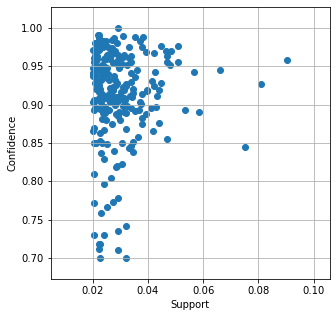

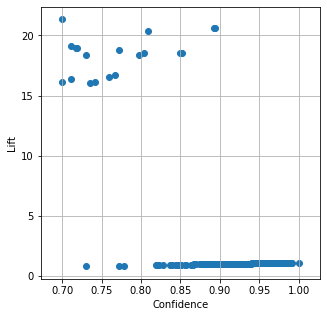

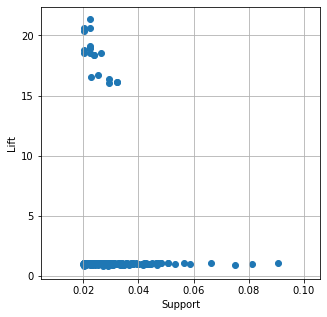

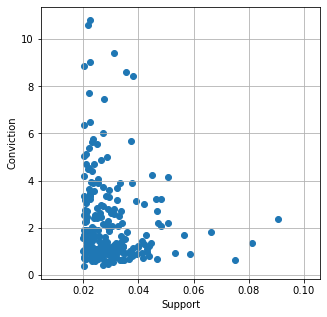

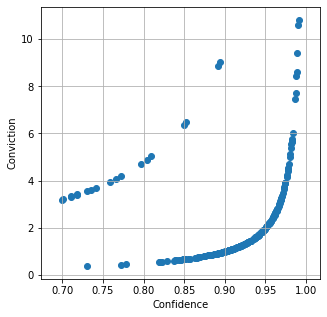

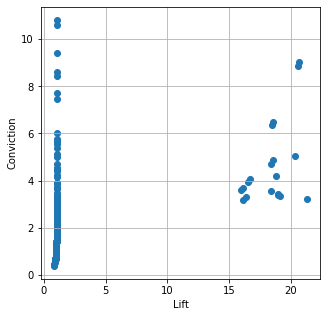

In [9]:
s_plot(sup,conf, "Support", "Confidence")
s_plot(conf,lift, "Confidence", "Lift")
s_plot(sup,lift, "Support", "Lift")
s_plot(sup, conv, "Support", "Conviction")
s_plot(conf, conv, "Confidence", "Conviction")
s_plot(lift, conv, "Lift", "Conviction")

Segundo os resultados, existe maior confiança nas regras quando o support tem valores mais baixo (entre 0.02 e 0.04) e quando a convicção é maior, porém o lift é maior quando os valores de confiança são inferiores a 90% (entre 0.7 e 0.9). 

Desta forma para a seleção das regras mais relevantes para além de optarmos por um threshold de 0.7 na confiança (já definido em cima), selecionámos dessas, aquelas que apenas apresentaram um lift superior ou igual a 16 e uma convicção superior a 5. 

Regras de Associação selecionadas:

In [10]:
rules[(rules["lift"]>=16) & (rules["conviction"]>4.5)].sort_values( by=['lift'],ascending=[False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
123,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.025176,0.043341,0.022511,0.894137,20.630282,0.021420,9.036748
118,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.022839,0.043341,0.020379,0.892280,20.587442,0.019389,8.880985
121,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)","(country:United Kingdom, GREEN REGENCY TEACUP AND SAUCER)",0.025176,0.039774,0.020379,0.809446,20.351315,0.019378,5.039137
124,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.026406,0.045924,0.022511,0.852484,18.562849,0.021298,6.467629
132,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032844,0.043341,0.026406,0.803995,18.550454,0.024983,4.880789
119,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.023987,0.045924,0.020379,0.849573,18.499444,0.019277,6.342436
129,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.030097,0.043341,0.023987,0.797003,18.389122,0.022683,4.712669


## **3.0 Objetivo 2 - Identificação dos conjuntos de itens máximos mais relevantes**

### 3.1 Pré-Processamento dos Dados

Neste objetivo optámos por utilizar o algoritmo Fpmax do mlxtend e por isto começou-se por transformar a base de dados de transações numa base de dados binária como um array: 

In [11]:
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(retail).transform(retail)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

"ACRYLIC HANGING JEWEL,BLUE"  "ACRYLIC HANGING JEWEL,PINK"  "ACRYLIC JEWEL ANGEL,PINK"  "ACRYLIC JEWEL ICICLE, BLUE"  "ACRYLIC JEWEL ICICLE, PINK"  "ACRYLIC JEWEL SNOWFLAKE, PINK"  "ACRYLIC JEWEL SNOWFLAKE,PINK"  "AIRLINE LOUNGE,METAL SIGN"  "ART LIGHTS,FUNK MONKEY"  "ASSORTED FLOWER COLOUR ""LEIS"""  "BATHROOM SCALES, TROPICAL BEACH"  "BIRTHDAY CARD, RETRO SPOT"  "BLACK TEA,COFFEE,SUGAR JARS"  "BREAD BIN, DINER STYLE, IVORY"  "BREAD BIN, DINER STYLE, MINT"  "BUNTING , SPOTTY "  "CAKESTAND, 3 TIER, LOVEHEART"  "CHARLIE+LOLA""EXTREMELY BUSY"" SIGN"  "CHRISTMAS GARLAND STARS,TREES"  "DECORATION , WOBBLY CHICKEN, METAL "  "DECORATION , WOBBLY RABBIT , METAL "  "DECORATION HEN ON NEST, HANGING"  "DECOUPAGE,GREETING CARD,"  "DIAMANTE HEART SHAPED WALL MIRROR, "  "ELEPHANT, BIRTHDAY CARD, "  "FANCY FONT BIRTHDAY CARD, "  "FEATHER PEN,COAL BLACK"  "FEATHER PEN,HOT PINK"  "FEATHER PEN,LIGHT PINK"  "FLOWER FAIRY,5 SUMMER B'DRAW LINERS"  "FLOWER GLASS GARLAND NECKL.36""BLACK"  "FLOWER GLASS GARLAND NECKL.36""BLUE"  "FLOWER GLASS GARLAND NECKL.36""GREEN"  "FLOWER GLASS GARLD NECKL36""AMETHYST"  "FLOWER GLASS GARLD NECKL36""TURQUOIS"  "FOLK ART GREETING CARD,pack/12"  "FOOD COVER WITH BEADS , SET 2 SIZES"  "GARLAND, MAGIC GARDEN 1.8M"  "GARLAND, VINTAGE BELLS"  "GREETING CARD, OVERCROWDED POOL."  "GREETING CARD, STICKY GORDON"  "GREETING CARD, TWO SISTERS."  "GREETING CARD,SQUARE, DOUGHNUTS"  "HOOK, 1 HANGER ,MAGIC GARDEN"  "KEY FOB , BACK DOOR "  "KEY FOB , FRONT  DOOR "  "KEY FOB , GARAGE DESIGN"  "KEY FOB , SHED"  "LARGE CAKE TOWEL, CHOCOLATE SPOTS"  "LETTER ""A"" BLING KEY RING"  "LETTER ""B"" BLING KEY RING"  "LETTER ""C"" BLING KEY RING"  "LETTER ""D"" BLING KEY RING"  "LETTER ""E"" BLING KEY RING"  "LETTER ""F"" BLING KEY RING"  "LETTER ""G"" BLING KEY RING"  "LETTER ""H"" BLING KEY RING"  "LETTER ""I"" BLING KEY RING"  "LETTER ""J"" BLING KEY RING"  "LETTER ""K"" BLING KEY RING"  "LETTER ""L"" BLING KEY RING"  "LETTER ""M"" BLING KEY RING"  "LETTER ""N"" BLING KEY RING"  "LETTER ""O"" BLING KEY RING"  "LETTER ""P"" BLING KEY RING"  "LETTER ""R"" BLING KEY RING"  "LETTER ""S"" BLING KEY RING"  "LETTER ""T"" BLING KEY RING"  "LETTER ""U"" BLING KEY RING"  "LETTER ""V"" BLING KEY RING"  "LETTER ""W"" BLING KEY RING"  "LETTER ""Y"" BLING KEY RING"  "LETTER ""Z"" BLING KEY RING"  "MERCHANT CHANDLER CREDIT ERROR, STO"  "METAL SIGN,CUPCAKE SINGLE HOOK"  "MUG , DOTCOMGIFTSHOP.COM "  "NURSERY A,B,C PAINTED LETTERS"  "PAPER CRAFT , LITTLE BIRDIE"  "PEARL & SHELL 42""NECKL. GREEN"  "PEARL & SHELL 42""NECKL. IVORY"  "PET MUG, GOLDFISH"  "PINK/WHITE ""KEEP CLEAN"" BULLET BIN"  "POCKET MIRROR ""GLAMOROUS"""  "RECORD FRAME 7"" SINGLE SIZE "  "RETRO ""TEA FOR ONE"" "  "RETRO PILL BOX , REVOLUTIONARY"  "RETRO PILL BOX KEY CHAIN,THE KING"  "RETRO TIN ASHTRAY,REVOLUTIONARY"  "RUBY GLASS NECKLACE 42"""  "RUSTIC WOODEN CABINET, GLASS DOORS"  "S/4 ICON COASTER,ELVIS LIVES"  "SET 3 RETROSPOT TEA,COFFEE,SUGAR"  "SILICON CUBE 25W, BLUE"  "SMALL POP BOX,FUNKY MONKEY"  "STRING OF 8 BUTTERFLIES,PINK"  "SWISS ROLL TOWEL, CHOCOLATE  SPOTS"  "SWISS ROLL TOWEL, PINK  SPOTS"  "TRAY, BREAKFAST IN BED"  "TUMBLER, BAROQUE"  "TUMBLER, NEW ENGLAND"  "Unsaleable, destroyed."  "WALL ART , LOVES' SECRET "  "WALL ART , THE MAGIC FOREST "  "WALL ART ,PUDDINGS "  "WALL ART,ONLY ONE PERSON "  "WHITE TEA,COFFEE,SUGAR JARS"  "WRAP, BILLBOARD FONTS DESIGN"  "WRAP, CAROUSEL"  "mouldy, thrown away."  "mouldy, unsaleable."  *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  12 RED ROSE PEG PLACE SETTINGS  1

Conjuntos de itens frequentes:

In [12]:
FI_fpgrowth = fpgrowth(binary_database, min_support=0.02, use_colnames=True)
FI_fpgrowth

,support,itemsets
0,0.901345,(country:United Kingdom)
1,0.094391,(WHITE HANGING HEART T-LIGHT HOLDER)
2,0.037436,(month:01)
3,0.060153,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.032270,(HOME BUILDING BLOCK WORD)
...,...,...
491,0.023044,"(country:United Kingdom, LARGE WHITE HEART OF WICKER)"
492,0.027801,"(country:United Kingdom, JUMBO BAG 50'S CHRISTMAS)"
493,0.027391,"(country:United Kingdom, JUMBO BAG VINTAGE DOILY)"
494,0.022593,"(country:United Kingdom, LUNCH BAG VINTAGE DOILY)"


### 3.2 Identificação dos conjuntos de itens máximos

In [13]:
from mlxtend.frequent_patterns import fpmax

FI_fpmax = fpmax(binary_database, min_support=0.02, use_colnames=True)
FI_fpmax

,support,itemsets
0,0.020051,(SET/3 RED GINGHAM ROSE STORAGE BOX)
1,0.020051,(FELTCRAFT BUTTERFLY HEARTS)
2,0.020051,(PANTRY MAGNETIC SHOPPING LIST)
3,0.020133,(LUNCH BOX WITH CUTLERY RETROSPOT)
4,0.020338,(LUNCH BAG DOILEY PATTERN)
...,...,...
239,0.056667,"(country:United Kingdom, ASSORTED COLOUR BIRD ORNAMENT)"
240,0.022101,"(LUNCH BAG RED RETROSPOT, country:United Kingdom, JUMBO BAG RED RETROSPOT)"
241,0.066139,"(country:United Kingdom, PARTY BUNTING)"
242,0.075119,"(country:United Kingdom, REGENCY CAKESTAND 3 TIER)"


### 3.3 Identificação das regras dos conjuntos de itens máximos


Criação de um dataframe que apresenta o support para todos os conjunto de itens máximos assim como os seus subconjuntos:

In [14]:
d={"support":[],
   "itemsets":[]
   } 

temp = []

for freqitemset in FI_fpgrowth["itemsets"]:
    for max_itemset in FI_fpmax["itemsets"]:
       if(freqitemset not in temp):
          if(freqitemset.issubset(max_itemset)):
             temp.append(freqitemset)
             numpy_array = FI_fpgrowth.loc[FI_fpgrowth['itemsets'] == freqitemset, 'support'].to_numpy()
             d["support"].append(numpy_array[0])
             d["itemsets"].append(freqitemset)

#new dataframe with maximal itemsets and their subsets
df=pd.DataFrame(d)
df             

,support,itemsets
0,0.901345,(country:United Kingdom)
1,0.094391,(WHITE HANGING HEART T-LIGHT HOLDER)
2,0.037436,(month:01)
3,0.060153,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.032270,(HOME BUILDING BLOCK WORD)
...,...,...
491,0.023044,"(country:United Kingdom, LARGE WHITE HEART OF WICKER)"
492,0.027801,"(country:United Kingdom, JUMBO BAG 50'S CHRISTMAS)"
493,0.027391,"(country:United Kingdom, JUMBO BAG VINTAGE DOILY)"
494,0.022593,"(country:United Kingdom, LUNCH BAG VINTAGE DOILY)"


Utilização do novo dataframe para gerar as regras de associação com o mesmo threshold utilizado no objetivo 1:

In [15]:
max_rules = association_rules(df, metric="confidence", min_threshold=0.70)
max_rules.sort_values(by=['lift'],ascending=[False])


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
178,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(PINK REGENCY TEACUP AND SAUCER),0.032147,0.032844,0.022511,0.700255,21.320626,0.021455,3.226597
177,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.025176,0.043341,0.022511,0.894137,20.630282,0.021420,9.036748
180,"(country:United Kingdom, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.022839,0.043341,0.020379,0.892280,20.587442,0.019389,8.880985
183,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)","(country:United Kingdom, GREEN REGENCY TEACUP AND SAUCER)",0.025176,0.039774,0.020379,0.809446,20.351315,0.019378,5.039137
232,(GARDENERS KNEELING PAD CUP OF TEA),"(country:United Kingdom, GARDENERS KNEELING PAD KEEP CALM)",0.031368,0.037231,0.022306,0.711111,19.099755,0.021138,3.332660
...,...,...,...,...,...,...,...,...,...
110,(DOLLY GIRL LUNCH BOX),(country:United Kingdom),0.035263,0.901345,0.028908,0.819767,0.909494,-0.002877,0.547377
141,(WOODLAND CHARLOTTE BAG),(country:United Kingdom),0.034566,0.901345,0.028293,0.818505,0.908093,-0.002863,0.543570
10,(SPACEBOY LUNCH BOX),(country:United Kingdom),0.037231,0.901345,0.028990,0.778634,0.863858,-0.004569,0.445666
11,(RED TOADSTOOL LED NIGHT LIGHT),(country:United Kingdom),0.035304,0.901345,0.027268,0.772358,0.856895,-0.004554,0.433378


Regras selecionadas:

In [16]:
max_rules[(max_rules["lift"]>=16) & (max_rules["conviction"]>4.5)].sort_values(by=['lift'],ascending=[False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
177,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.025176,0.043341,0.022511,0.894137,20.630282,0.021420,9.036748
180,"(country:United Kingdom, ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.022839,0.043341,0.020379,0.892280,20.587442,0.019389,8.880985
183,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)","(country:United Kingdom, GREEN REGENCY TEACUP AND SAUCER)",0.025176,0.039774,0.020379,0.809446,20.351315,0.019378,5.039137
179,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.026406,0.045924,0.022511,0.852484,18.562849,0.021298,6.467629
170,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032844,0.043341,0.026406,0.803995,18.550454,0.024983,4.880789
181,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER),0.023987,0.045924,0.020379,0.849573,18.499444,0.019277,6.342436
172,"(country:United Kingdom, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.030097,0.043341,0.023987,0.797003,18.389122,0.022683,4.712669
